# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [ ]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm
!python install

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.2/920.2 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 41.2 MB/s eta 0:00:00
  Attempting uninstall: blis
    Found existing installation: blis 1.3.0
    Uninstalling blis-1.3.0:
      Successfully uninstalled blis-1.3.0
  Attempting uninstall: thinc
    Found existing installation: thinc 8.3.6
    Uninstalling thinc-8.3.6:
      Successfully uninstalled thinc-8.3.6
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.7
    Uninstalling spacy-3.8.7:
      Successfully uninstalled spacy-3.8.7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 21.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's 

## Importing the necessary libraries

In [ ]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [ ]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [ ]:
# Import the first file - True.csv
true_df = pd.read_csv("/content/True.csv")
# Import the second file - Fake.csv
fake_df = pd.read_csv("/content/Fake.csv")



## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [ ]:
# Inspect the DataFrame with True News to understand the given data
print(true_df.head())

                                                                   title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
print("\nDataset Info:")
print(true_df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB
None


In [ ]:
# Inspect the DataFrame with Fake News to understand the given data
fake_df.head()

title  \
0              Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing   
1                        Drunk Bragging Trump Staffer Started Russian Collusion Investigation   
2   Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’   
3               Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)   
4                       Pope Francis Just Called Out Donald Trump During His Christmas Speech   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [ ]:
# Display basic info (data types, non-null counts)
print("\nDataset Info:")
print(fake_df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB
None


In [ ]:
# Print the column details for True News DataFrame
true_df.columns

Index(['title', 'text', 'date'], dtype='object')

In [ ]:
# Print the column details for Fake News Dataframe
fake_df.columns

Index(['title', 'text', 'date'], dtype='object')

In [ ]:
# Print the column names of both DataFrames
print(true_df.columns)
print(fake_df.columns)

Index(['title', 'text', 'date'], dtype='object')
Index(['title', 'text', 'date'], dtype='object')


In [ ]:
# Stats

print(true_df.describe())
print(fake_df.describe())

                                                       title  \
count                                                  21417   
unique                                                 20826   
top     Factbox: Trump fills top jobs for his administration   
freq                                                      14   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [ ]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df["news_label"] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df["news_label"] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [ ]:
# Combine the true and fake news DataFrames into a single DataFrame
combined_news = pd.concat([true_df, fake_df], ignore_index=True)

In [ ]:
# Display the first 5 rows of the combined DataFrame to verify the result
combined_news.head()

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [ ]:
# Check Presence of Null Values
combined_news.isnull().sum()

title         21
text          21
date          42
news_label     0
dtype: int64

In [ ]:
# Handle Rows with Null Values
combined_news.dropna(inplace=True)

In [ ]:
# Check Presence of Null Values
combined_news.isnull().sum()

title         0
text          0
date          0
news_label    0
dtype: int64

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [ ]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
combined_news['news_text'] = combined_news['title'].fillna('') + ' ' + combined_news['text'].fillna('')

# Drop the irrelevant columns from the DataFrame as they are no longer needed
combined_news = combined_news.drop(columns=['title', 'text'])
# Display the first 5 rows of the updated DataFrame to check the result
combined_news.head()

date  news_label  \
0  December 31, 2017            1   
1  December 29, 2017            1   
2  December 31, 2017            1   
3  December 30, 2017            1   
4  December 29, 2017            1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [ ]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = combined_news['news_text']
# Add 'news_label' column to the new dataframe for topic identification
df_clean = combined_news[['news_text', 'news_label']].copy()

df_clean.head()

news_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both disc

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [ ]:
# Write the function here to clean the text and remove all the unnecessary elements

# Convert to lower case

# Remove text in square brackets

# Remove punctuation

# Remove words with numbers
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [ ]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['cleaned_text'] = df_clean['news_text'].apply(clean_text)
df_clean[['news_text', 'cleaned_text']].head()

news_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both disc

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [ ]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
import spacy

# Load SpaCy English model (disable parser & NER for speed)
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

In [ ]:
def SpacyLemmatizeNouns(text):
    doc = nlp(text)

    # Keep only non-stopword NOUNs (NN, NNS) and lemmatize them
    lemmatized_nouns = [token.lemma_ for token in doc if token.pos_ == "NOUN" and not token.is_stop]

    return ' '.join(lemmatized_nouns)



#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [ ]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean_sample = df_clean.sample(500)
df_clean_sample['lemmatized_text'] = df_clean_sample['cleaned_text'].apply(SpacyLemmatizeNouns)


### Save the Cleaned data as a csv file (Recommended)

In [ ]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean_sample.to_csv("clean_df.csv", index=False)
df_clean_sample = pd.read_csv("clean_df.csv")

In [ ]:
# Check the first few rows of the DataFrame
df_clean_sample.head(10)

news_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       POVERTY PIMP AL SHARPTON USES THE BIBLE To Say Dems Should Give “The Big Payback” To Republicans  He s being nominated to sit in Garland s seat,  Sharpton said.  President Barack Obama nominated Judge Garland, who has got as much or more qualifications as this nominee, to have been the Supreme Court judge   They stalled, they filibustered, they would not even give a hearing to Judge Garland. It is time for the Democrats now to say since you changed the rules, you re going to have to live by the rules that you applied to President Obama s nominee, and we are not going to allow you to change it, and we will use th

In [ ]:
# Check the dimensions of the DataFrame
df_clean_sample.shape

(500, 4)

In [ ]:
# Check the number of non-null entries and data types of each column
df_clean_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_text        500 non-null    object
 1   news_label       500 non-null    int64 
 2   cleaned_text     499 non-null    object
 3   lemmatized_text  498 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [ ]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

In [ ]:
# Split features (X) and labels (y)
X = df_clean_sample['lemmatized_text']
y = df_clean_sample['news_label']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=50, stratify=y)

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [ ]:
df_clean_sample['cleaned_text'] = df_clean_sample['cleaned_text'].fillna('')
df_clean_sample['lemmatized_text'] = df_clean_sample['lemmatized_text'].fillna('')

In [ ]:
# Add a new column to calculate the character length of cleaned news text
df_clean_sample["character_length_cleaned"] = df_clean_sample["cleaned_text"].apply(len)
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_clean_sample["character_length_lemmatized"] = df_clean_sample["lemmatized_text"].apply(len)

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))


<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

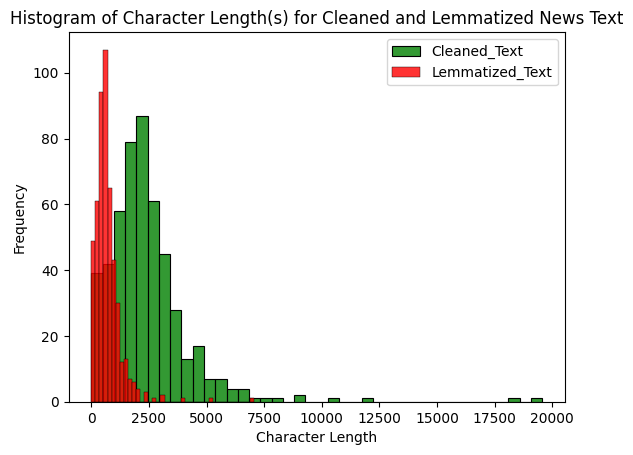

In [ ]:
# Create a histogram plot to visualise character lengths
sns.histplot(df_clean_sample['character_length_cleaned'], bins=40, color='green', label='Cleaned_Text', kde=False, alpha=0.8)

# Add histogram for cleaned news text
sns.histplot(df_clean_sample['character_length_lemmatized'], bins=40, color='red', label='Lemmatized_Text', kde=False, alpha=0.8)

# Add histogram for lemmatized news text with POS tags removed

plt.title('Histogram of Character Length(s) for Cleaned and Lemmatized News Text')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

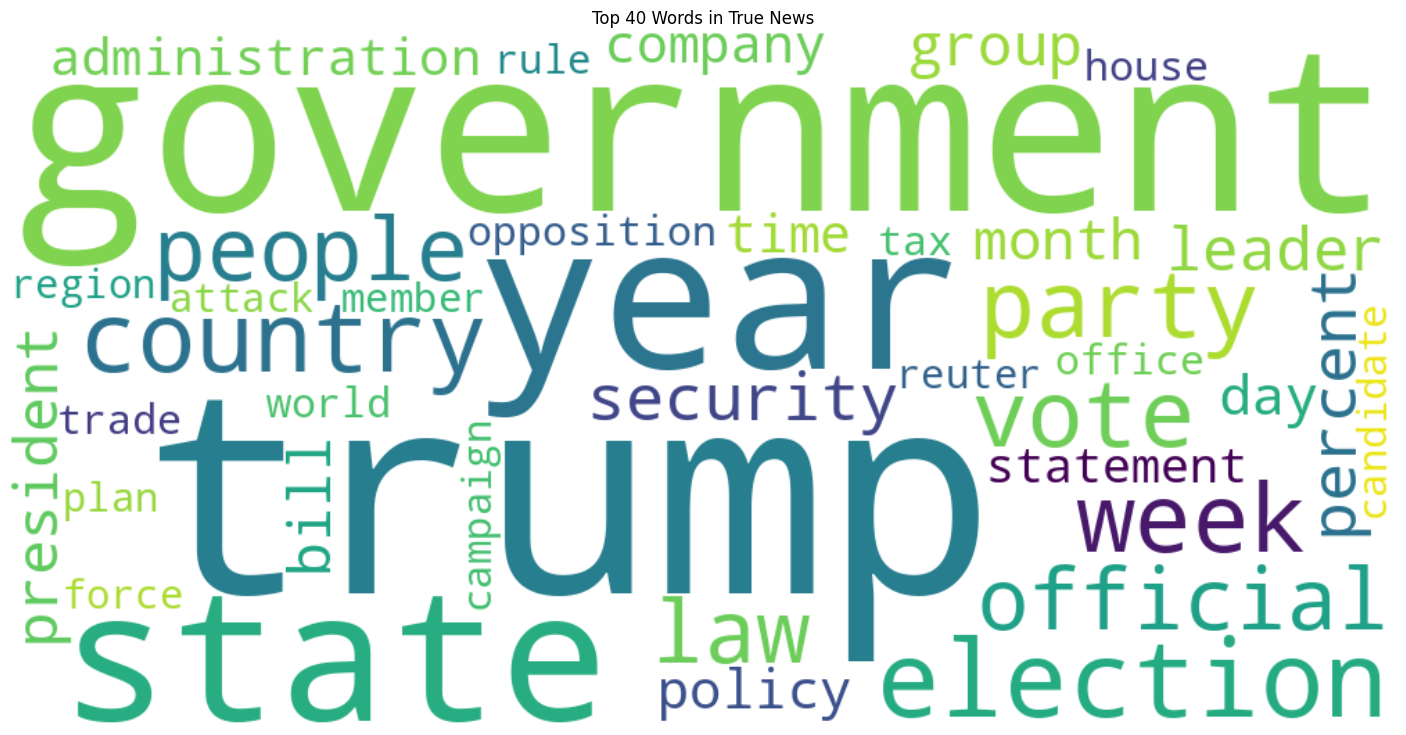

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
# Filter news with label 1 (True News) and convert to it string and handle any non-string values
# Generate word cloud for True News

train_df = pd.DataFrame({'lemmatized_text': X_train, 'news_label': y_train})
true_news = train_df[train_df['news_label'] == 1]['lemmatized_text']
true_text = true_news.astype(str).str.cat(sep=' ')
wordcloud = WordCloud(width=1000, height=500, max_words=40, background_color='white').generate(true_text)


plt.figure(figsize=(19, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News')
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

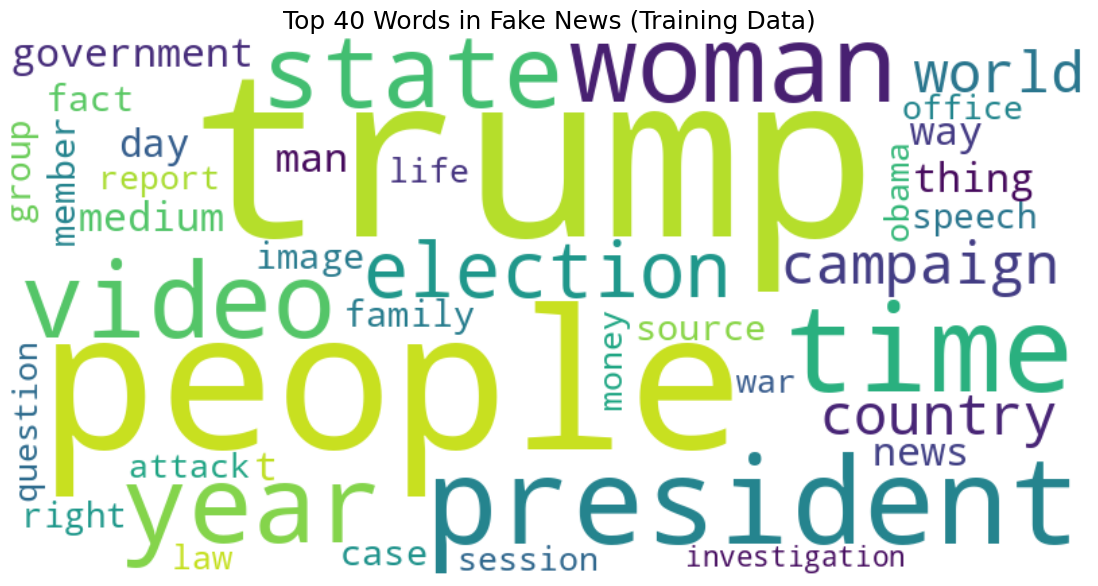

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text
# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
# Generate word cloud for Fake News


train_df = pd.DataFrame({'lemmatized_text': X_train, 'news_label': y_train})
fake_news = train_df[train_df['news_label'] == 0]['lemmatized_text']
fake_text = fake_news.astype(str).str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(fake_text)

# Plot the Word Cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in Fake News (Training Data)", fontsize=18)
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [ ]:
# Write a function to get the specified top n-grams
# Write a function to get the specified top n-grams
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def get_top_ngrams(corpus, ngram_range=(2, 2), top_n=20):
    """
    Extract top n most frequent n-grams from a list of text documents.

    Parameters:
        corpus (list or Series): List of cleaned text strings.
        ngram_range (tuple): The n-gram range, e.g., (2, 2) for bigrams.
        top_n (int): Number of top n-grams to return.

    Returns:
        DataFrame: Top n-grams and their counts.
    """
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)

    # Get word counts
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Convert to DataFrame
    return pd.DataFrame(words_freq[:top_n], columns=['ngram', 'count'])


##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [ ]:
# Handle NaN values in the text data
X_train = X_train.fillna('')

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

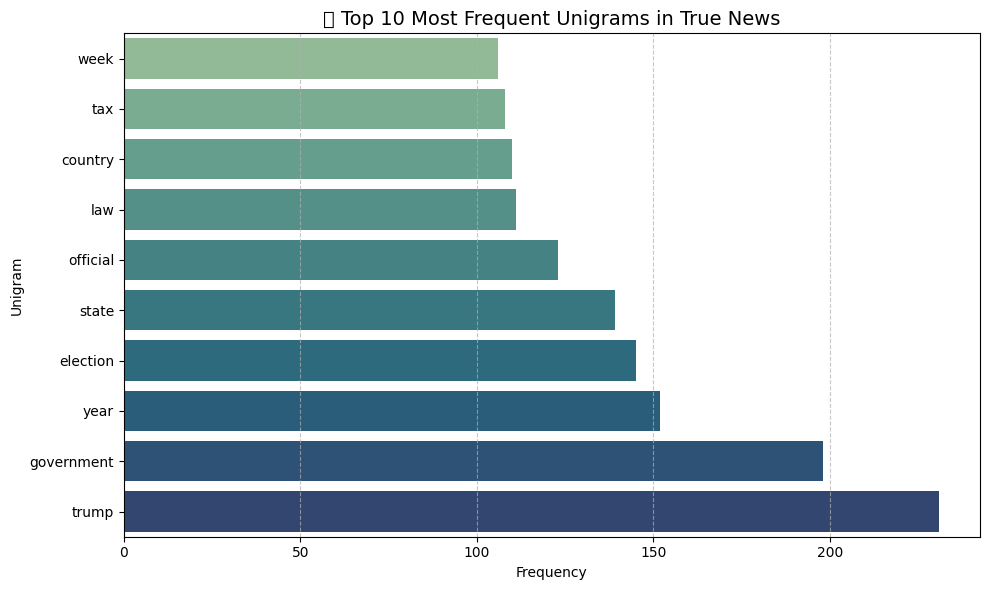

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine X_train and y_train into a DataFrame
train_df = pd.DataFrame({'text': X_train, 'label': y_train})

# Filter for true news only (label == 1) and drop NaNs
true_news_texts = train_df[train_df['label'] == 1]['text'].fillna('')

# Initialize CountVectorizer for unigrams, removing English stop words
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words='english')
X_vec = vectorizer.fit_transform(true_news_texts)

# Get total frequency of each unigram
word_counts = X_vec.sum(axis=0)
word_freq = [(word, word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
top_unigrams = sorted(word_freq, key=lambda x: x[1], reverse=True)[:10]

# Create DataFrame and sort it for nice plotting
df_top_unigrams = pd.DataFrame(top_unigrams, columns=['Unigram', 'Frequency']).sort_values(by='Frequency', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Unigram', data=df_top_unigrams, palette='crest')
plt.title('🔍 Top 10 Most Frequent Unigrams in True News', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [ ]:


# Step 1: Combine text and labels into DataFrame
train_df = pd.DataFrame({'text': X_train, 'label': y_train})

# Step 2: Filter for true news only
true_news_texts = train_df[train_df['label'] == 1]['text'].fillna('')

# Step 3: Vectorize using bigrams and remove English stopwords
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_bigrams = vectorizer.fit_transform(true_news_texts)

# Step 4: Sum frequencies of bigrams
bigram_freq = X_bigrams.sum(axis=0)
bigram_freq = [(bigram, bigram_freq[0, idx]) for bigram, idx in vectorizer.vocabulary_.items()]
top_bigrams = sorted(bigram_freq, key=lambda x: x[1], reverse=True)[:10]

# Step 5: Convert to DataFrame and sort for horizontal plotting
df_top_bigrams = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency']).sort_values(by='Frequency', ascending=True)

# Step 6: Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Bigram', data=df_top_bigrams, palette='Blues_r')
plt.title('🔗 Top 10 Most Frequent Bigrams in True News', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



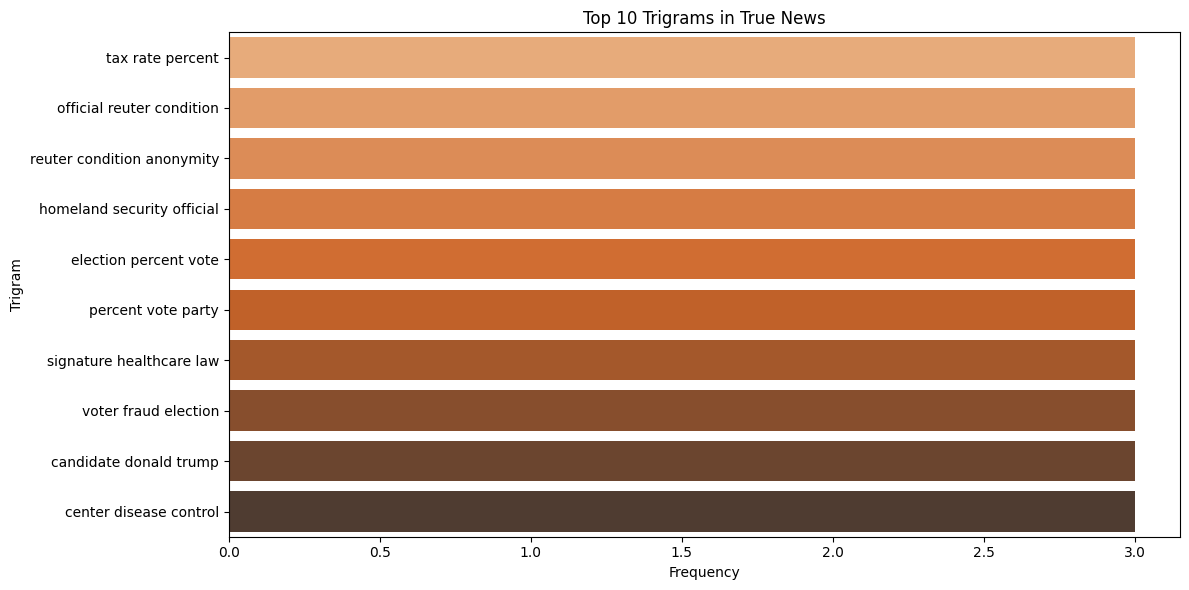

In [ ]:
# Combine X_train and y_train into a single DataFrame
train_df = pd.DataFrame({'text': X_train, 'label': y_train})

# Filter for true news (label == 1)
true_news = train_df[train_df['label'] == 1]['text'].fillna('')

# Initialize CountVectorizer for trigrams
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
X_vec = vectorizer.fit_transform(true_news)

# Sum up trigram frequencies
sum_words = X_vec.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
top_trigrams = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame
df_top_trigrams = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency'])

# Plot the trigrams
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Trigram', data=df_top_trigrams, palette='Oranges_d')
plt.title('Top 10 Trigrams in True News')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.tight_layout()
plt.show()


### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

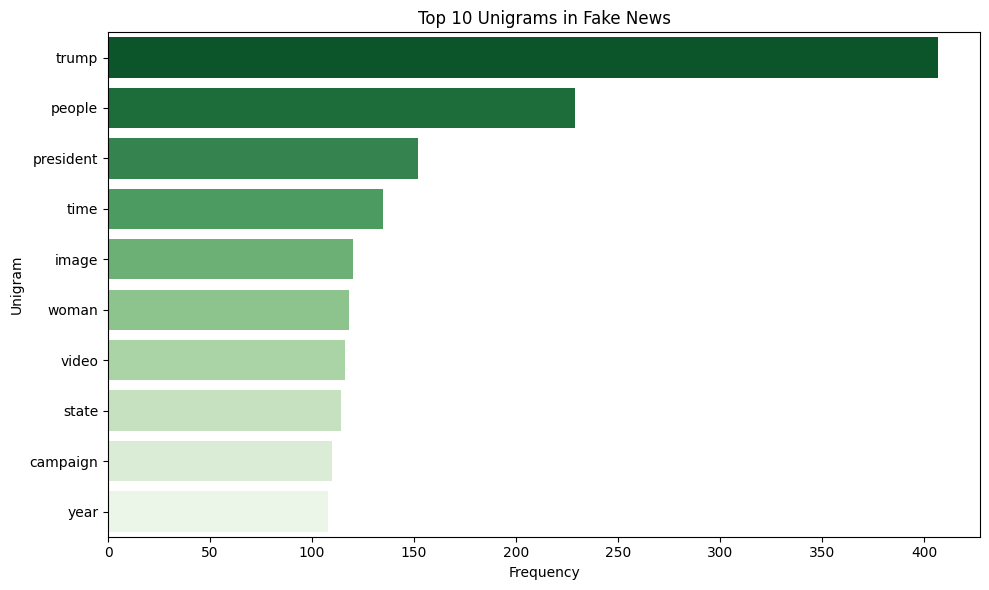

In [ ]:
# Combine X_train and y_train into a single DataFrame
train_df = pd.DataFrame({'text': X_train, 'label': y_train})

# Filter fake news (label == 0)
fake_news = train_df[train_df['label'] == 0]['text'].fillna('')

# Initialize CountVectorizer for unigrams
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words='english')
X_vec = vectorizer.fit_transform(fake_news)

# Sum word frequencies
sum_words = X_vec.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
top_unigrams = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame
df_top_unigrams = pd.DataFrame(top_unigrams, columns=['Unigram', 'Frequency'])

# Plot the top 10 unigrams
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Unigram', data=df_top_unigrams, palette='Greens_r')
plt.title('Top 10 Unigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.tight_layout()
plt.show()


##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



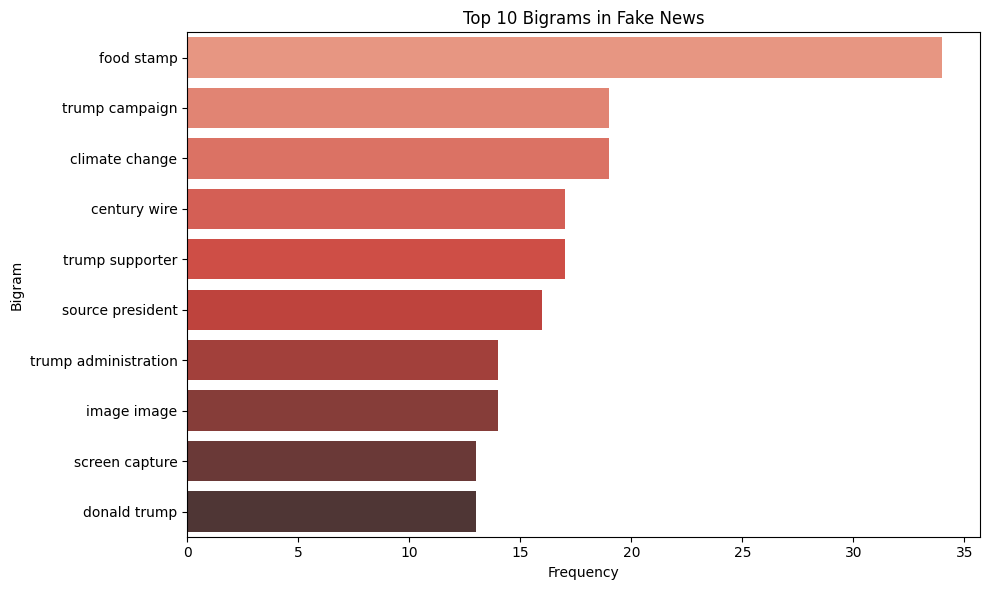

In [ ]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph

# Combine X_train and y_train into a single DataFrame
train_df = pd.DataFrame({'text': X_train, 'label': y_train})

# Filter fake news (label == 0)
fake_news = train_df[train_df['label'] == 0]['text'].fillna('')

# Initialize CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_vec = vectorizer.fit_transform(fake_news)

# Sum word frequencies
sum_words = X_vec.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
top_bigrams = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame
df_top_bigrams = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])

# Plot the top 10 bigrams
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Bigram', data=df_top_bigrams, palette='Reds_d')
plt.title('Top 10 Bigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.tight_layout()
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



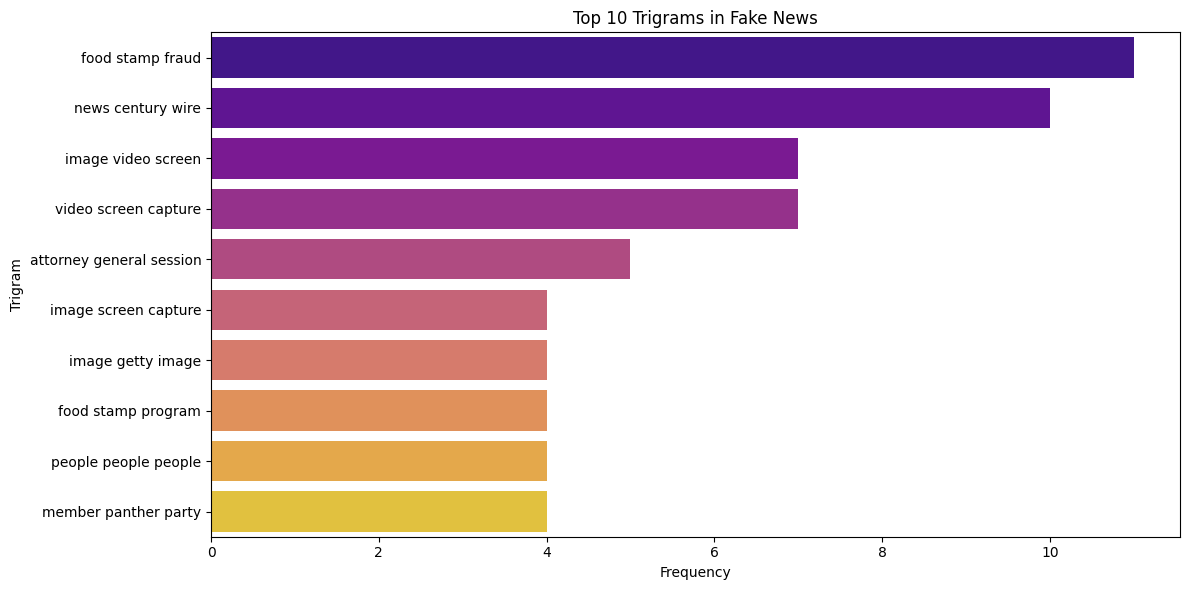

In [ ]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
# Combine X_train and y_train into a single DataFrame
train_df = pd.DataFrame({'text': X_train, 'label': y_train})

# Filter for fake news (label == 0)
fake_news = train_df[train_df['label'] == 0]['text'].fillna('')

# Initialize CountVectorizer for trigrams
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
X_vec = vectorizer.fit_transform(fake_news)

# Sum trigram frequencies
sum_words = X_vec.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
top_trigrams = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]

# Create a DataFrame
df_top_trigrams = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency'])

# Plot the top 10 trigrams
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Trigram', data=df_top_trigrams, palette='plasma')
plt.title('Top 10 Trigrams in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.tight_layout()
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [ ]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
#!pip install gensim



In [ ]:
##!pip install gensim
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api

# Download and load the pre-trained word2vec-google-news-300 model
word2vec_model = api.load("word2vec-google-news-300")

# Check the vocabulary size
print(f"Loaded Word2Vec model with {len(word2vec_model.key_to_index)} words.")


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Loaded Word2Vec model with 3000000 words.


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [ ]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data


## Extract the target variable for the training data and validation data



import numpy as np
from gensim.utils import simple_preprocess
from tqdm import tqdm

# Function to compute the average word2vec embedding for a document
def document_vector(doc, model):
    """
    Generate document vector by averaging the word vectors for words in the document.
    Words not found in the Word2Vec model are ignored.
    Returns a zero vector if no valid word is found.
    """
    if not isinstance(doc, str):
        return np.zeros(model.vector_size)

    # Tokenize and preprocess
    words = simple_preprocess(doc)

    # Filter words in vocabulary
    valid_words = [word for word in words if word in model.key_to_index]

    if not valid_words:
        return np.zeros(model.vector_size)

    # Compute mean of valid word vectors
    return np.mean([model[word] for word in valid_words], axis=0)

# Compute document vectors for training data
print("Extracting Word2Vec vectors for training data...")
X_train_vectors = np.array([document_vector(doc, word2vec_model) for doc in tqdm(X_train)])

# Compute document vectors for validation data
print("Extracting Word2Vec vectors for validation data...")
X_val_vectors = np.array([document_vector(doc, word2vec_model) for doc in tqdm(X_val)])

# Extract target variables
y_train_array = np.array(y_train)
y_val_array = np.array(y_val)

# Confirm shapes
print(f"\n✅ Shapes:")
print(f"X_train_vectors: {X_train_vectors.shape}")
print(f"X_val_vectors:   {X_val_vectors.shape}")
print(f"y_train_array:   {y_train_array.shape}")
print(f"y_val_array:     {y_val_array.shape}")


Extracting Word2Vec vectors for training data...


100%|██████████| 350/350 [00:00<00:00, 720.35it/s]


Extracting Word2Vec vectors for validation data...


100%|██████████| 150/150 [00:00<00:00, 589.12it/s]


✅ Shapes:
X_train_vectors: (350, 300)
X_val_vectors:   (150, 300)
y_train_array:   (350,)
y_val_array:     (150,)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [ ]:

## Initialise Logistic Regression model

## Train Logistic Regression model on training data

## Predict on validation data

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train model on training data vectors and labels
logreg.fit(X_train_vectors, y_train_array)

# Predict on validation data vectors
y_val_pred = logreg.predict(X_val_vectors)




##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [ ]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy_score = accuracy_score(y_val_array, y_val_pred)
precision_score = precision_score(y_val_array, y_val_pred, average='binary')
recall_score = recall_score(y_val_array, y_val_pred, average='binary')
f1_score = f1_score(y_val_array, y_val_pred, average='binary')

# Print the metrics
print(f"Validation Accuracy : {accuracy_score: }")
print(f"Validation Precision: {precision_score: }")
print(f"Validation Recall   : {recall_score: }")
print(f"Validation F1-Score : {f1_score: }")


Validation Accuracy :  0.8533333333333334
Validation Precision:  0.8405797101449275
Validation Recall   :  0.8405797101449275
Validation F1-Score :  0.8405797101449275


In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_val_array, y_val_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        81
           1       0.84      0.84      0.84        69

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [ ]:
## Initialise Decision Tree model

## Train Decision Tree model on training data

## Predict on validation data

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on training vectors and labels
dt_model.fit(X_train_vectors, y_train_array)

# Predict on validation vectors
y_val_pred_dt = dt_model.predict(X_val_vectors)



##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [ ]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_val_array, y_val_pred_dt)
precision = precision_score(y_val_array, y_val_pred_dt, average='binary')
recall = recall_score(y_val_array, y_val_pred_dt, average='binary')
f1 = f1_score(y_val_array, y_val_pred_dt, average='binary')

# Print the metrics
print(f"Validation Accuracy (Decision Tree): {accuracy:.4f}")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall   : {recall:.4f}")
print(f"Validation F1-Score : {f1:.4f}")


Validation Accuracy (Decision Tree): 0.7200
Validation Precision: 0.7015
Validation Recall   : 0.6812
Validation F1-Score : 0.6912


In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_val_array, y_val_pred_dt))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74        81
           1       0.70      0.68      0.69        69

    accuracy                           0.72       150
   macro avg       0.72      0.72      0.72       150
weighted avg       0.72      0.72      0.72       150



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [ ]:
## Initialise Random Forest model

## Train Random Forest model on training data

## Predict on validation data

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the model on training vectors and labels
rf_model.fit(X_train_vectors, y_train_array)

# Predict on validation vectors
y_val_pred_rf = rf_model.predict(X_val_vectors)



 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [ ]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
# Calculate metrics
accuracy_score = accuracy_score(y_val_array, y_val_pred_rf)
precision_score = precision_score(y_val_array, y_val_pred_rf, average='binary')
recall_score = recall_score(y_val_array, y_val_pred_rf, average='binary')
f1_score = f1_score(y_val_array, y_val_pred_rf, average='binary')
# Print the metrics
print(f"Validation Accuracy : {accuracy_score: }")
print(f"Validation Precision: {precision_score: }")
print(f"Validation Recall   : {recall_score: }")
print(f"Validation F1-Score : {f1_score: }")


Validation Accuracy :  0.86
Validation Precision:  0.8529411764705882
Validation Recall   :  0.8405797101449275
Validation F1-Score :  0.8467153284671532


In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_val_array, y_val_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87        81
           1       0.85      0.84      0.85        69

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

The character length histogram clearly demonstrates that lemmatized text is significantly shorter than cleaned text. This reduction in character count after lemmatization implies successful removal of morphological variations and unnecessary terms, which helps standardize the dataset and reduces noise for model training.

The unigram frequency analysis of true news reveals that the most frequent terms are politically and administratively oriented, including words like trump, government, election, state, and official. These words reflect a strong focus on formal reporting and real-world governance topics, which are typically covered by legitimate news sources.

The bigram frequency analysis for true news also reflects a structured reporting style. Phrases like tax rate, attorney general, administration official, and election campaign indicate coverage of public policy, legal issues, and political activities, all of which are commonly found in verified news articles.

In contrast, the top bigrams and trigrams in fake news highlight a significantly different vocabulary and narrative pattern. Common bigrams such as food stamp, trump campaign, climate change, and donald trump appear to target emotionally sensitive or controversial issues. These may be intended to provoke reactions or push certain narratives, a typical strategy in misinformation content.

Fake news trigrams such as food stamp fraud, news century wire, image video screen, and attorney general session further suggest a trend of referencing conspiracies, questionable media sources, or visual content. The frequent use of terms like image screen capture and getty image may point to attempts to lend false credibility through the use of visual media.

Overall, the n-gram analysis reinforces the assumption that true news exhibits more structured and formal language, whereas fake news often relies on emotional triggers, visual framing, and repeated sensational phrases.

Regarding the machine learning models used for classification, Logistic Regression achieved a strong overall performance with a validation accuracy of 85.3% and an F1-score of 0.84. Its balanced precision and recall across both classes (true and fake) indicate that it is effective for binary classification in this context, especially when the data is well-preprocessed and linearly separable.

The Decision Tree model had the lowest performance, with validation accuracy of 72.0% and an F1-score of 0.69. While interpretable, its lower scores suggest potential overfitting and an inability to generalize well across varied data. The model may be capturing noise rather than meaningful patterns, making it less suitable for text-based classification tasks without additional regularization.

The Random Forest model delivered the best overall results with a validation accuracy of 86.0% and an F1-score of 0.85. Its higher precision and recall, especially when compared to the Decision Tree, indicate strong generalization capabilities. Being an ensemble of decision trees, it successfully mitigates overfitting and handles non-linear relationships, making it highly effective for fake news detection.

Between Logistic Regression and Random Forest, both provide comparable results, but Random Forest slightly outperforms in accuracy and stability. Therefore, it can be considered the most reliable model among the three for production use.

From an application standpoint, the preprocessing steps including text cleaning and lemmatization played a significant role in improving classification accuracy. Reducing text noise and normalizing vocabulary improved the quality of input features, resulting in better learning outcomes.

The combination of text preprocessing, n-gram analysis, and model evaluation provides a comprehensive understanding of fake vs true news characteristics and the strengths of different classifiers.

These findings reinforce that fake news detection is achievable using conventional NLP techniques combined with supervised learning models, and highlight the importance of model selection and data quality in building a robust classification system.